# Determine whether an image contains a columnar cactus using Convolutional Neural Network (CNN) with Fastai

### Writer: Amrik Singh
<i class="fa fa-linkedin" style="font-size:20px"></i>&nbsp;
[linkedin.com/in/amrik220/](https://www.linkedin.com/in/amrik220/)&emsp;
<i class="fa fa-github" style="font-size:20px"></i>&nbsp;
[github.com/amrik220](https://github.com/amrik220)

***

# Introduction

This notebook contains Python code to determine whether an image contains a columnar cactus or not using Convolutional Neural Network (CNN) with Fastai. The dataset is from [Aerial Cactus Identification, a Kaggle Competition](https://www.kaggle.com/c/aerial-cactus-identification/overview). The dataset can be download from [here](https://www.kaggle.com/c/aerial-cactus-identification/data) and has following files:
1. train: training set of 17,500 (32 x 32) thumbnails
2. train.csv: training set lables, positive class has_cactus = 1

For the purpose of this task, the train dataset will be split into train (.64), validation (.16), test (.2) sets.

Programming Environment: Python 3.6.9 and Google Colaboratory

# Set up environment and explore data

In [1]:
# Display output of all code lines in Jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

!python --version # Check python version
!jupyter-notebook --version

Python 3.6.9
5.2.2


## Import required libraries and functions

In [2]:
# Import required libraries and functions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

from fastai import *
from fastai.vision import *
import torch

In [3]:
# Clone the GitHub respository containing the data files to Colaboratory
import os
if os.path.exists('/content/imageProcessing') == False:
  !git clone https://github.com/amrik220/imageProcessing

In [4]:
# load data labels from the csv file
path = '/content/imageProcessing/aerial_cactus_identification/'
labels = pd.read_csv(path + 'train.csv')

labels.head()
labels.shape

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


(17500, 2)

In [5]:
# check class balance
table = labels.has_cactus.value_counts()
table
not_cactus = table[0]
cactus = table[1]

text = "\n\nPercentage of cactus: {:.2f}\nPercentage of not_cactus: {:.2f}"
print(text.format(cactus/(cactus+not_cactus)*100, not_cactus/(cactus+not_cactus)*100))

1    13136
0     4364
Name: has_cactus, dtype: int64



Percentage of cactus: 75.06
Percentage of not_cactus: 24.94


## Load images

Split data into training and test set

In [6]:
# Split data into training and test set
trainLabels, testLabels = train_test_split(labels, test_size = 0.2, random_state=220)

**Preview images containing cactus**

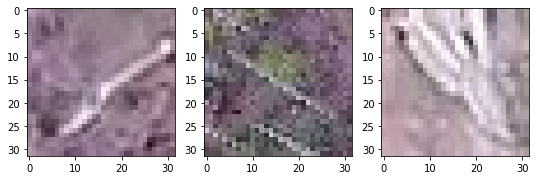

In [7]:
fig,ax = plt.subplots(nrows=1,ncols=3, figsize=(9,3))
for i,idx in enumerate(trainLabels[trainLabels['has_cactus'] == 1]['id'][0:3]):
    img_path = os.path.join(path,'train', idx)
    # print(img_path)
    ax[i].imshow(img.imread(img_path))

**Preview images not containing cactus**

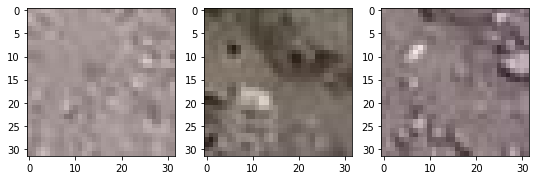

In [8]:
fig,ax = plt.subplots(nrows=1,ncols=3, figsize=(9,3))
for i,idx in enumerate(trainLabels[trainLabels['has_cactus'] == 0]['id'][0:3]):
    img_path = os.path.join(path,'train', idx)
    # print(img_path)
    ax[i].imshow(img.imread(img_path))

In [9]:
# load training set images
train_img = ImageList.from_df(trainLabels, path= path+'train')
test_img = ImageList.from_df(testLabels, path= path+'train')
train_img
test_img

ImageList (14000 items)
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
Path: /content/imageProcessing/aerial_cactus_identification/train

ImageList (3500 items)
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
Path: /content/imageProcessing/aerial_cactus_identification/train

# Build CNN using pretrained model with Fastai

In [10]:
transformations = get_transforms(do_flip=True, flip_vert=True, max_rotate=10.0, 
                                 max_zoom=1.1, max_lighting=0.2, max_warp=0.2, 
                                 p_affine=0.75, p_lighting=0.75)

In [11]:
model_img = (train_img
        .split_by_rand_pct(0.01)
        .label_from_df()
        .add_test(test_img)
        .transform(transformations, size=128)
        .databunch(path='.', bs=64)
        .normalize(imagenet_stats)
       )
      # .databunch(path='.', bs=64, device= torch.device('cuda:0')) # CUDA-capable device

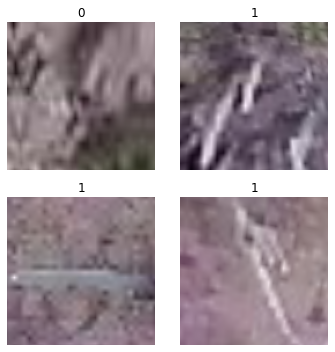

In [12]:
model_img.show_batch(rows=2, figsize=(5,5))

# Train the model

In [13]:
trained_model = cnn_learner(model_img, models.densenet161, metrics=[error_rate, accuracy])

# Available models in fastai
# resnet18, resnet34, resnet50, resnet101, resnet152
# squeezenet1_0, squeezenet1_1
# densenet121, densenet169, densenet201, densenet161
# vgg16_bn, vgg19_bn
# alexnet

### Find best learning rate

In [14]:
# # Code below is commented because the trained model is saved and will be loaded again.
# # run following code to find best learning rate
# trained_model.lr_find()
# trained_model.recorder.plot(suggestion=True)

#### Fitting pretrained model to data

***Output of following code is shown in next markdown cell.***

In [15]:
# # Code below is commented because the trained model is saved and will be loaded again.

# lr = 3e-02
# trained_model.fit_one_cycle(5, slice(lr))

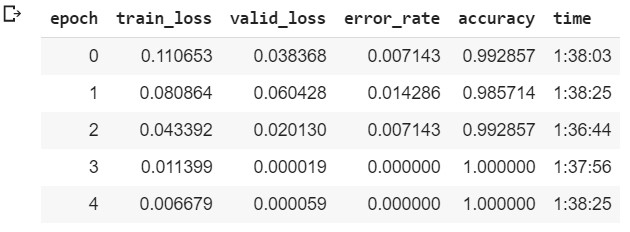

#### Save the trained model
Training process in time and compute extensive. Therefore, it's good practice to save the trained model for future. Then, load the saved model for making predicitions.

In [16]:
# # Code below is commented because the trained model is saved and will be loaded again.

# trained_model.export()

#### Load the saved model

In [17]:
# trained_model = load_learner('/content/')
trained_model = load_learner('/content/', test=test_img)

# Prediction

In [19]:
# interpreter = ClassificationInterpretation.from_learner(trained_model)
# interpreter.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [ ]:
# # Use while training for the first time
# preds,_ = trained_model.get_preds(ds_type=DatasetType.Fix)
# trainResults = preds.numpy()[:, 0]

In [ ]:
# # Use while training for the first time
# preds,_ = trained_model.get_preds(ds_type=DatasetType.Valid)
# validationResults = preds.numpy()[:, 0]

In [20]:
preds, y = trained_model.get_preds(ds_type=DatasetType.Test)
# testResults = preds.numpy()[:, 0]

In [30]:
target = torch.from_numpy(np.array(testLabels['has_cactus']))

In [42]:
acc = accuracy(preds, target)
acc.numpy()
print("\n\nTest accuracy: {:.2f}".format(acc.numpy()*100))

array(0.999429, dtype=float32)



Test accuracy: 99.94


# References
1. https://www.kaggle.com/kenseitrg/simple-fastai-exercise
2. https://www.kaggle.com/navneeth/feedforward-cnn-fastai
3. https://www.kaggle.com/umangjpatel/aerial-cactus-cnn